In [68]:
# Pandas
import pandas as pd
# Numpy
import numpy as np
# MatplotLib
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_selector
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

# Models
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression

# Classification Metrics
from sklearn.metrics import accuracy_score, recall_score, precision_score, \
f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, \
RocCurveDisplay



In [69]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [70]:
df = pd.read_csv('/content/wines_SPA.csv')
df.head()


,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [71]:
ml_df = df

In [72]:
ml_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [73]:
ml_df.shape

(7500, 11)

In [74]:
ml_df.duplicated().sum()

5452

In [75]:
ml_df =df.drop_duplicates()
ml_df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
2046,Mustiguillo,Finca Terrerazo,2017,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
2047,Matarromera,Gran Reserva,2011,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
2048,Sei Solo,Preludio,2016,4.2,388,Espana,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0
2049,Vinedos de Paganos,El Puntido,2005,4.2,384,Espana,Rioja,73.00,Rioja Red,4.0,3.0


In [76]:
df.isna().sum()

winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64

In [95]:
ml_df['wine']

0                 Tinto
1         Vina El Pison
2                 Unico
3                 Unico
4                 Unico
             ...       
2046    Finca Terrerazo
2047       Gran Reserva
2048           Preludio
2049         El Puntido
6100       Rioja Blanco
Name: wine, Length: 2048, dtype: object

In [77]:
ml_df.dtypes

winery          object
wine            object
year            object
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object

In [78]:
ml_df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [79]:
ml_df.drop(columns='country', inplace =True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [80]:
ml_df

,winery,wine,year,rating,num_reviews,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...
2046,Mustiguillo,Finca Terrerazo,2017,4.2,390,El Terrerazo,24.45,Red,4.0,3.0
2047,Matarromera,Gran Reserva,2011,4.2,389,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0
2048,Sei Solo,Preludio,2016,4.2,388,Ribera del Duero,31.63,Ribera Del Duero Red,5.0,3.0
2049,Vinedos de Paganos,El Puntido,2005,4.2,384,Rioja,73.00,Rioja Red,4.0,3.0


In [81]:
# loop for each columns to see the calue counts 
dtypes = ml_df.dtypes
str_cols = dtypes[dtypes =='object'].index
str_cols
for col in str_cols:
  print(f' `column = {col}')
  print(ml_df[col].value_counts(dropna=False))
  print('\n\n')


 `column = winery
Vega Sicilia                            97
Alvaro Palacios                         48
Artadi                                  43
La Rioja Alta                           36
Marques de Murrieta                     33
                                        ..
Valdelosfrailes                          1
Briego                                   1
Guillem Carol - Cellers Carol Valles     1
Particular                               1
Binigrau                                 1
Name: winery, Length: 480, dtype: int64



 `column = wine
Tinto                                                 56
Unico                                                 41
Valbuena 5o                                           32
Reserva                                               31
Priorat                                               26
                                                      ..
San Valentin Parellada                                 1
Silvanus Edicion Limitada Ribera del Duero         

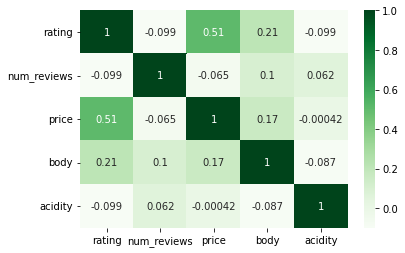

In [82]:
# coorelation for heatmap 


corr = ml_df.corr()

# plotCorrelation
sns.heatmap(corr, cmap = 'Greens', annot = True)

In [83]:
# There is minimal correlation betweeen numeric data columns.

##Preprocessing

In [96]:
#  Train Test Split prep

X = ml_df.drop(columns= 'acidity')
y = ml_df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [97]:
y_train.value_counts(normalize= True)

75.00     0.007161
65.00     0.005208
95.00     0.005208
59.90     0.005208
26.90     0.004557
            ...   
78.50     0.000651
33.15     0.000651
59.87     0.000651
159.80    0.000651
37.86     0.000651
Name: price, Length: 1058, dtype: float64

In [98]:
mean_imputer = SimpleImputer(strategy ='mean')
frequency_imputer = SimpleImputer(strategy = 'most_frequent')
# OneHotEncoder and Standard 
ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)
scaler = StandardScaler()
# categorical and numeric selectors to select columns
num_selector = make_column_selector(dtype_include = 'number')
cat_selector = make_column_selector(dtype_include = 'object')
# the pipeline for the numeric and categircal 
num_pipeline = make_pipeline(mean_imputer, scaler)
nom_pipeline = make_pipeline(frequency_imputer, ohe)
# make tuples for preprcessing the categrical and numeric columsn 
numeric_tuple = (num_pipeline, num_selector)
nominal_tuple= (nom_pipeline, num_selector)


In [93]:
preprocessor = make_column_transformer(numeric_tuple, nominal_tuple, remainder='drop')

In [94]:
preprocessor 

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer()),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ecf7a0af0>),
                                ('pipeline-2',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8ecf7a0af0>

First choice: dataset 1

1. Source of data

2. Brief description of data: The dataset contains 2048 different kind of red wines from Spain also 11 feature

3. What is the target? acidity

4. What does one row represent? (A person?  A business?  An event? A product?) A product which is wine 

5. Is this a classification or regression problem?
It is a classification problem s


6. How many features does the data have?
11 features
7. How many rows are in the dataset?
7500 rows
8. What, if any, challenges do you foresee in cleaning, exploring, or modeling with this dataset? According to data, I could say better quality which is acidity could be more expensive than normal.